In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Deep_learning-datasets/anonymized_data.csv')

In [ ]:
df.head()

,EJWY,VALM,EGXO,HTGR,SKRF,NNSZ,NYLC,GWID,TVUT,CJHI,...,LKKS,UOBF,VBHE,FRWU,NDYZ,QSBO,JDUB,TEVK,EZTM,Label
0,-2.032145,1.019576,-9.658715,-6.210495,3.156823,7.457850,-5.313357,8.508296,3.959194,-5.246654,...,-2.209663,-10.340123,-7.697555,-5.932752,10.872688,0.081321,1.276316,5.281225,-0.516447,0.0
1,8.306217,6.649376,-0.960333,-4.094799,8.738965,-3.458797,7.016800,6.692765,0.898264,9.337643,...,0.851793,-9.678324,-6.071795,1.428194,-8.082792,-0.557089,-7.817282,-8.686722,-6.953100,1.0
2,6.570842,6.985462,-1.842621,-1.569599,10.039339,-3.623026,8.957619,7.577283,1.541255,7.161509,...,1.376085,-8.971164,-5.302191,2.898965,-8.746597,-0.520888,-7.350999,-8.925501,-7.051179,1.0
3,-1.139972,0.579422,-9.526530,-5.744928,4.834355,5.907235,-4.804137,6.798810,5.403670,-7.642857,...,0.270571,-8.640988,-8.105419,-5.079015,9.351282,0.641759,1.898083,3.904671,1.453499,0.0
4,-1.738104,0.234729,-11.558768,-7.181332,4.189626,7.765274,-2.189083,7.239925,3.135602,-6.211390,...,-0.013973,-9.437110,-6.475267,-5.708377,9.623080,1.802899,1.903705,4.188442,1.522362,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EJWY    500 non-null    float64
 1   VALM    500 non-null    float64
 2   EGXO    500 non-null    float64
 3   HTGR    500 non-null    float64
 4   SKRF    500 non-null    float64
 5   NNSZ    500 non-null    float64
 6   NYLC    500 non-null    float64
 7   GWID    500 non-null    float64
 8   TVUT    500 non-null    float64
 9   CJHI    500 non-null    float64
 10  NVFW    500 non-null    float64
 11  VLBG    500 non-null    float64
 12  IDIX    500 non-null    float64
 13  UVHN    500 non-null    float64
 14  IWOT    500 non-null    float64
 15  LEMB    500 non-null    float64
 16  QMYY    500 non-null    float64
 17  XDGR    500 non-null    float64
 18  ODZS    500 non-null    float64
 19  LNJS    500 non-null    float64
 20  WDRT    500 non-null    float64
 21  LKKS    500 non-null    float64
 22  UO

In [ ]:
df['Label'].unique()

array([0., 1.])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_data = scaler.fit_transform(df.drop('Label',axis=1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
encoder = Sequential()
encoder.add(Dense(15,activation='relu',input_shape=[30]))
encoder.add(Dense(8,activation='relu',input_shape=[15]))
encoder.add(Dense(4,activation='relu',input_shape=[8]))
encoder.add(Dense(2,activation='relu',input_shape=[4]))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
decoder = Sequential()
decoder.add(Dense(4,activation='relu',input_shape=[2]))
decoder.add(Dense(8,activation='relu',input_shape=[4]))
decoder.add(Dense(15,activation='relu',input_shape=[8]))
decoder.add(Dense(30,activation='relu',input_shape=[15]))

In [ ]:
autoencoder = Sequential([encoder,decoder])

In [ ]:
autoencoder.compile(loss='mse',optimizer=SGD(learning_rate=0.9))

In [ ]:
scaled_data.shape

(500, 30)

In [ ]:
scaled_data

array([[0.        , 0.26590249, 0.19337622, ..., 0.76146479, 0.89187148,
        0.69449859],
       [0.78003243, 0.82101815, 0.86384145, ..., 0.13118915, 0.14173837,
        0.18919308],
       [0.64909787, 0.85415725, 0.79583534, ..., 0.16350718, 0.12891497,
        0.18149351],
       ...,
       [0.98154196, 0.64205789, 0.74518214, ..., 0.04904853, 0.06277868,
        0.23240366],
       [0.74388166, 0.86176345, 0.75260151, ..., 0.19478426, 0.03890874,
        0.22364704],
       [0.77871175, 0.78883203, 0.78611589, ..., 0.17766076, 0.08887577,
        0.22545067]])

In [ ]:
autoencoder.fit(scaled_data,scaled_data,epochs=200)

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2747
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2213 
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2197  
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2175 
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2150 
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2156 
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2119 
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2122  
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2122 
Epoch 10/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2118 
Epoch 11/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2064  
Epoch 12/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2025  
Epoch 13/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2017 
Epoch 14/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2002
Epoch 15/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - l

In [ ]:
losses = pd.DataFrame(autoencoder.history.history)

<Axes: >

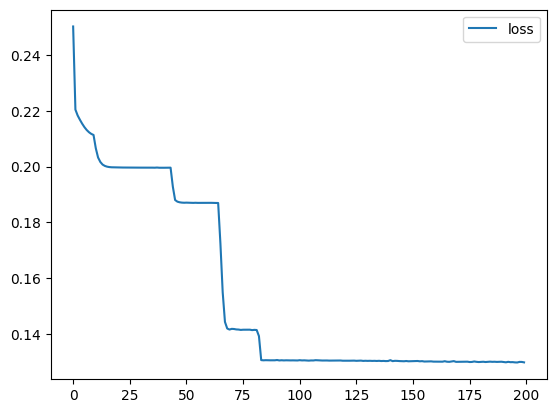

In [ ]:
losses.plot()

In [ ]:
encoded_2dim = encoder.predict(scaled_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
encoded_2dim

array([[0.00000000e+00, 1.82493702e-01],
       [2.94292641e+00, 2.17956471e+00],
       [3.17129493e+00, 2.09765172e+00],
       [0.00000000e+00, 4.91854548e-03],
       [1.85546547e-01, 1.21929631e-01],
       [2.93025637e+00, 2.15901184e+00],
       [3.06787753e+00, 2.04822016e+00],
       [2.83102393e+00, 2.06110048e+00],
       [0.00000000e+00, 0.00000000e+00],
       [2.64469624e-01, 4.90922093e-01],
       [1.37786210e-01, 4.93854642e-01],
       [3.01567912e+00, 2.06596065e+00],
       [3.36229444e+00, 1.86910319e+00],
       [8.29479098e-03, 2.36847892e-01],
       [3.22974038e+00, 1.81719816e+00],
       [2.49361008e-01, 2.91755974e-01],
       [3.03790569e+00, 1.80874991e+00],
       [0.00000000e+00, 3.03881019e-02],
       [3.18942499e+00, 2.22690463e+00],
       [3.26910353e+00, 2.18363667e+00],
       [2.93549442e+00, 1.99240136e+00],
       [2.57991076e-01, 4.79816616e-01],
       [3.00499439e+00, 1.88141513e+00],
       [9.70611274e-02, 1.09766826e-01],
       [3.066818

In [ ]:
df.index

RangeIndex(start=0, stop=500, step=1)

In [ ]:
results = pd.DataFrame(encoded_2dim,index=df.index,columns=['C1','C2'])

In [ ]:
results = pd.concat([results,df['Label']],axis=1)

In [ ]:
results

,C1,C2,Label
0,0.000000,0.182494,0.0
1,2.942926,2.179565,1.0
2,3.171295,2.097652,1.0
3,0.000000,0.004919,0.0
4,0.185547,0.121930,0.0
...,...,...,...
495,0.195107,0.199165,0.0
496,0.143776,0.413207,0.0
497,3.008000,1.955090,1.0
498,3.009520,1.911811,1.0


<Axes: xlabel='C1', ylabel='C2'>

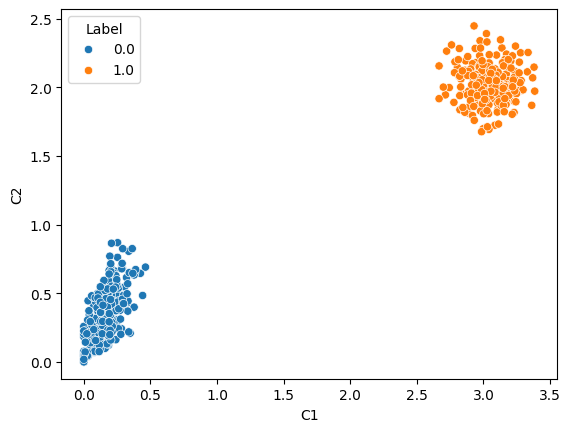

In [ ]:
import seaborn as sns
sns.scatterplot(data=results,x='C1',y='C2',hue='Label')